# Sales Data Analysis

## İmports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Veri Keşfi ve Veri Temizleme

In [3]:
sales = pd.read_csv('Downloads/sales_data.csv', parse_dates = ['date'])


In [4]:
sales.shape

(1000, 8)

In [5]:
sales.head()


,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [6]:
sales.describe()


,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [62]:

sales['client_type'].value_counts()

#np.unique(sales['client_type'].values, return_counts=True)

Retail       775
Wholesale    225
Name: client_type, dtype: int64

In [58]:
#Veri setine alışmak için parçalarını inceliyorum
pd.DataFrame(sales[sales['client_type']=='Retail'].loc[4:15,'warehouse'])


,warehouse
4,Central
6,West
7,Central
9,North
10,Central
11,Central
12,Central
13,Central
14,Central
15,West


In [9]:
pd.DataFrame(sales.iloc[0:5,2:4])

,client_type,product_line
0,Retail,Miscellaneous
1,Retail,Breaking system
2,Retail,Suspension & traction
3,Wholesale,Frame & body
4,Retail,Engine


In [60]:
#Tekrar eden veri olup olmadığını kontrol ediyorum. Dönen satır sayısı verisetine eşit olduğu için tekrar yoktur.
len(sales.drop_duplicates())

1000

In [12]:
# Custom total sütünu oluşturdum.
sales['numpy_total']=sales['unit_price'].values*sales['quantity'].values
sales


,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,numpy_total
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,134.80
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,173.61
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,263.44
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,605.44
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,120.96
...,...,...,...,...,...,...,...,...,...
995,2021-08-28,Central,Retail,Electrical system,9,32.87,295.83,Credit card,295.83
996,2021-08-28,West,Wholesale,Breaking system,32,10.03,320.96,Transfer,320.96
997,2021-08-28,West,Wholesale,Electrical system,12,32.80,393.64,Transfer,393.60
998,2021-08-28,North,Retail,Frame & body,5,48.25,241.23,Cash,241.25


## Veri Görselleştirme

#### Satış Sayısı Olarak En Çok Alışveriş Yapılan Ürün Kategorisi


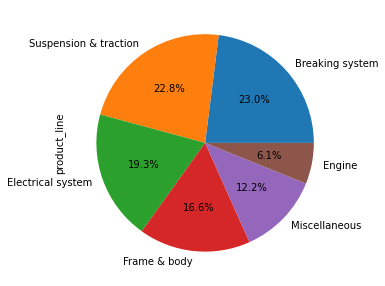

In [44]:
sales['product_line'].value_counts().plot(kind='pie', figsize= (5,5), autopct="%.1f%%")
plt.show()

#### En Çok Kullanılan Ödeme Yöntemi

<AxesSubplot:>

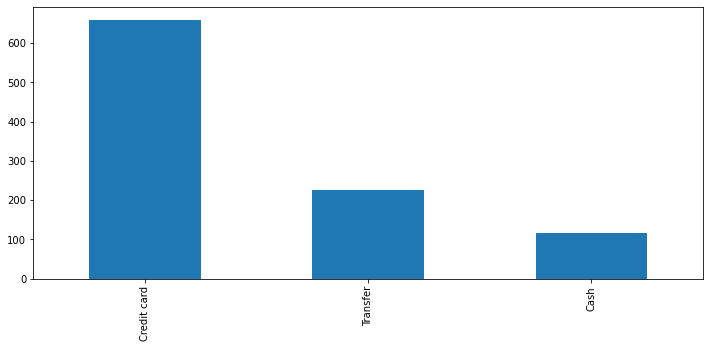

In [14]:
sales['payment'].value_counts().plot(kind='bar', figsize= (12,5))

#### Toptan ve Parakende Satış Sayıları

<AxesSubplot:>

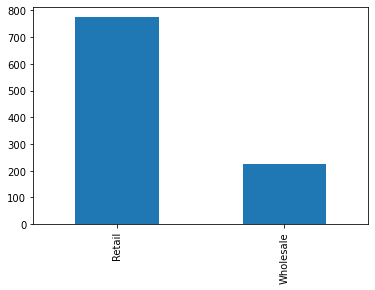

In [15]:
sales['client_type'].value_counts().plot(kind = 'bar')

In [16]:
sales.groupby('warehouse').min()

,date,client_type,product_line,quantity,unit_price,total,payment,numpy_total
warehouse,,,,,,,,
Central,2021-06-01,Retail,Breaking system,1,10.75,11.05,Cash,11.05
North,2021-06-01,Retail,Breaking system,1,10.35,10.35,Cash,10.35
West,2021-06-01,Retail,Breaking system,1,10.03,10.42,Cash,10.42


#### En Çok Alışveriş Yapılan Ay

<AxesSubplot:xlabel='months', ylabel='numpy_total'>

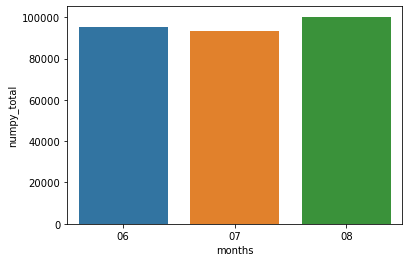

In [43]:
sales['months']=sales['date'].apply(lambda x: str(x).split('-')[1])

analysis1 = sales.groupby('months').sum()

sns.barplot(x=analysis1.index, y=analysis1.numpy_total)

#### Sütünlar Arasındaki Korelasyon

In [54]:
corelation = sales.drop(columns='total').corr()
corelation

,quantity,unit_price,numpy_total
quantity,1.000000,0.035822,0.870203
unit_price,0.035822,1.000000,0.372943
numpy_total,0.870203,0.372943,1.000000


<AxesSubplot:>

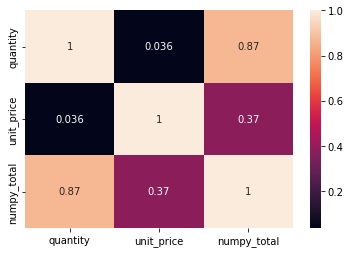

In [55]:

sns.heatmap(corelation, annot=True)


## İletişim

[Uzay Peker (LinkedIn)](https://www.linkedin.com/in/uzaypeker/)

[Uzay Peker (Github)](https://github.com/spacegondar)